# scikit-learn

There is a sample which building a decision tree model which classify iris.

/home/ml/.ml-env/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ml/.ml-env/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


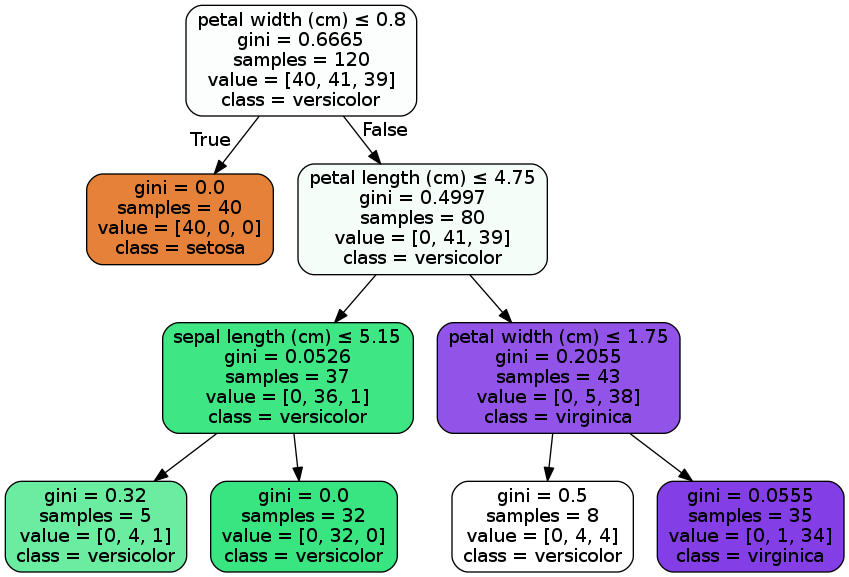

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn import datasets
from pydotplus import graph_from_dot_data
from IPython.display import Image
 
# Load data
iris = datasets.load_iris()
features = iris.data
categories = iris.target
 
# Cross-Validation setting
X_train, X_test, y_train, y_test = train_test_split(features, categories, test_size=0.2, random_state=42)
rs = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
cv_sets = rs.get_n_splits(X_train.shape[0])
params = {'max_depth': np.arange(2,11), 'min_samples_leaf': np.array([5])}
 
# Learning
def performance_metric(y_true, y_predict):
  score = f1_score(y_true, y_predict, average='micro')
  return score
 
classifier = DecisionTreeClassifier()
scoring_fnc = make_scorer(performance_metric)
grid = GridSearchCV(classifier, params, cv=cv_sets, scoring=scoring_fnc)
best_clf = grid.fit(X_train, y_train)
 
# Plot decision tree
dot_data = export_graphviz(best_clf.best_estimator_, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graph_from_dot_data(dot_data)  
Image(graph.create_png())

# Mecab & Juman++

There is a sample which does a same thing with Mecab and Juman++.

In [2]:
from MeCab import Tagger
from pyknp import Juman
 
target_text = u"すもももももももものうち"
 
m = Tagger("-Owakati")
print("***** Mecab *****")
print(m.parse(target_text))
 
juman = Juman()
result = juman.analysis(target_text)
print("***** Juman *****")
print(' '.join([mrph.midasi for mrph in result.mrph_list()]))

***** Mecab *****
すもも も もも も もも の うち 

***** Juman *****
すもも も もも も もも の うち


# TFLearn & Tensorflow

There is a sample which building a Neural Network model which recognize handwritten numbers.

You can see some visualization after you run all codes of cells with tensorboard.
tensorboard command : 

```bash
deactivate
tensorboard --logdir='/tmp/tflearn_logs' --port=6006
```

In [3]:
import numpy as np
import tensorflow as tf
import tflearn
import tflearn.datasets.mnist as mnist

## 1. Load data
X_train, y_train, X_test, y_test = mnist.load_data(one_hot=True)

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [4]:
import tfgraphviz as tfg

## 2. Build Model
tf.reset_default_graph()
net = tflearn.input_data([None, X_train.shape[1]])
net = tflearn.fully_connected(net, 128, activation='ReLU')
net = tflearn.fully_connected(net, 32, activation='ReLU')
net = tflearn.fully_connected(net, 10, activation='softmax')
net = tflearn.regression(net, optimizer='sgd', learning_rate=0.01, loss='categorical_crossentropy')
model = tflearn.DNN(net, tensorboard_verbose=3)

In [5]:
## 3. Traning
model.fit(X_train, y_train, validation_set=0.1, show_metric=True, batch_size=100, n_epoch=20)

Training Step: 9899  | total loss: 0.57466 | time: 11.426s
| SGD | epoch: 020 | loss: 0.57466 - acc: 0.8816 -- iter: 49400/49500
Training Step: 9900  | total loss: 0.53421 | time: 12.463s
| SGD | epoch: 020 | loss: 0.53421 - acc: 0.8864 | val_loss: 0.32080 - val_acc: 0.9109 -- iter: 49500/49500
--


In [6]:
## 4. Testing
predictions = np.array(model.predict(X_test)).argmax(axis=1)
actual = y_test.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis=0)
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.9097


# Others

There are some other special library's samples.

## Seaborn

It's a visualization library based on matplotlib.

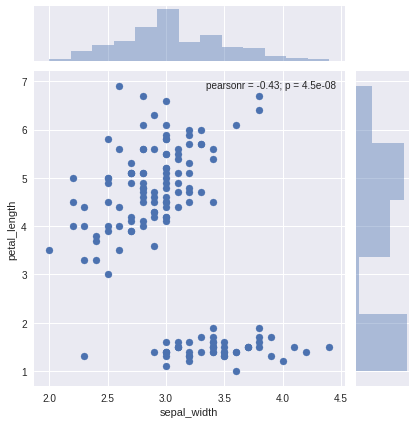

In [7]:
import seaborn as sns
%matplotlib inline

sns_iris = sns.load_dataset("iris")
sns.jointplot('sepal_width', 'petal_length', data=sns_iris)

## tfgraphviz

A simple graphviz wrapper to visualize a graph like TensorFlow & TensorBoard

Following sample is copied from this article http://qiita.com/akimach/items/d6d87e9fcdc4800d492a

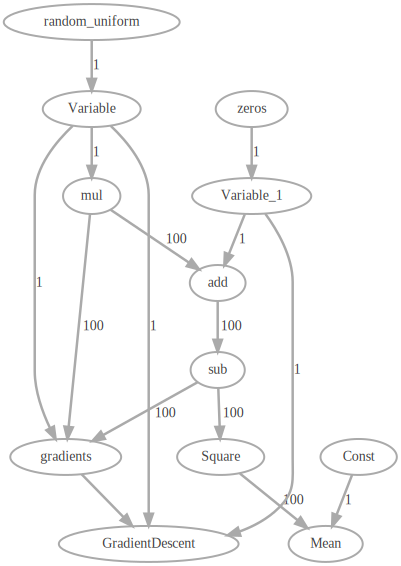

In [8]:
tf.reset_default_graph()

# Creating input and correct result data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

# Build network
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Output graph with tfgraphviz
tfg.board(tf.get_default_graph())